# Student Performance Dataset Project 

## Dataset
[Data](https://archive.ics.uci.edu/ml/datasets/student+performance)

* 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* 2 sex - student's sex (binary: 'F' - female or 'M' - male)
* 3 age - student's age (numeric: from 15 to 22)
* 4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
* 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 -secondary education or 4 - higher education)
* 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
* 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* 16 schoolsup - extra educational support (binary: yes or no)
* 17 famsup - family educational support (binary: yes or no)
* 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* 19 activities - extra-curricular activities (binary: yes or no)
* 20 nursery - attended nursery school (binary: yes or no)
* 21 higher - wants to take higher education (binary: yes or no)
* 22 internet - Internet access at home (binary: yes or no)
* 23 romantic - with a romantic relationship (binary: yes or no)
* 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
* 30 absences - number of school absences (numeric: from 0 to 93)

In [18]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

from sklearn.model_selection import train_test_split

 ## Data exploration

In [19]:
# Path to the csv file
data_path = 'student/student-mat.csv'

# Load the data from the file
data = pd.read_csv(data_path, ';')

In [20]:
# Check the data file
print("The dataset has %d rows and %d columns." % data.shape)
data.head()

The dataset has 395 rows and 33 columns.


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Text(0, 0.5, 'Frequency')

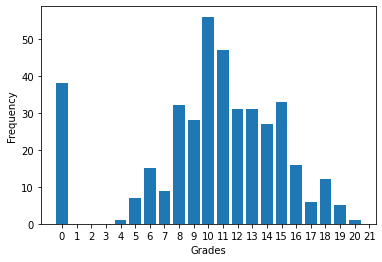

In [21]:
# Plot grades
grades = data['G3'].to_numpy()
bins = np.arange(0, grades.max() + 1.5) - 0.5

fix, ax = plt.subplots()
ax.hist(grades, bins, rwidth=0.8)
ax.set_xticks(bins + 0.5)
ax.set_xlabel('Grades')
ax.set_ylabel('Frequency')

In [22]:
data.loc[data['G3'] == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
128,GP,M,18,R,GT3,T,2,2,services,other,...,3,3,3,1,2,4,0,7,4,0
130,GP,F,15,R,GT3,T,3,4,services,teacher,...,4,2,2,2,2,5,0,12,0,0
131,GP,F,15,U,GT3,T,1,1,at_home,other,...,4,3,3,1,2,4,0,8,0,0
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,...,5,3,3,1,1,5,0,9,0,0
135,GP,F,15,U,GT3,T,4,4,services,at_home,...,4,3,3,1,1,5,0,11,0,0
136,GP,M,17,R,GT3,T,3,4,at_home,other,...,5,4,5,2,4,5,0,10,0,0
137,GP,F,16,U,GT3,A,3,3,other,other,...,4,3,2,1,1,5,0,4,0,0
140,GP,M,15,U,GT3,T,4,3,teacher,services,...,2,2,2,1,1,3,0,7,9,0
144,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,0,5,0,0
146,GP,F,15,U,GT3,T,3,2,health,services,...,3,3,2,1,1,3,0,6,7,0


In [23]:
# Remove outliers
data = data.loc[data['G3'] != 0]
print("The dataset has %d rows and %d columns." % data.shape)

The dataset has 357 rows and 33 columns.


Text(0, 0.5, 'Frequency')

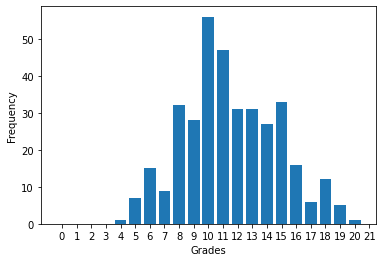

In [24]:
# Plot grades
grades = data['G3'].to_numpy()
bins = np.arange(0, grades.max() + 1.5) - 0.5

fix, ax = plt.subplots()
ax.hist(grades, bins, rwidth=0.8)
ax.set_xticks(bins + 0.5)
ax.set_xlabel('Grades')
ax.set_ylabel('Frequency')

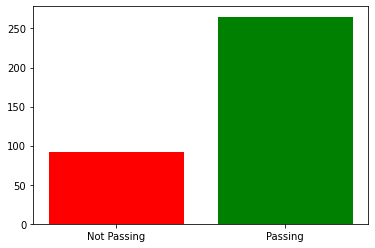

In [26]:
# Plot passing students
passing = pd.value_counts(data['G3'].values>=10, sort=False)[1]
not_passing = data.shape[0] - passing

x = np.array(['Not Passing', 'Passing'])
y = np.array([not_passing, passing])
plt.bar(x, y, color=['red', 'green'])
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

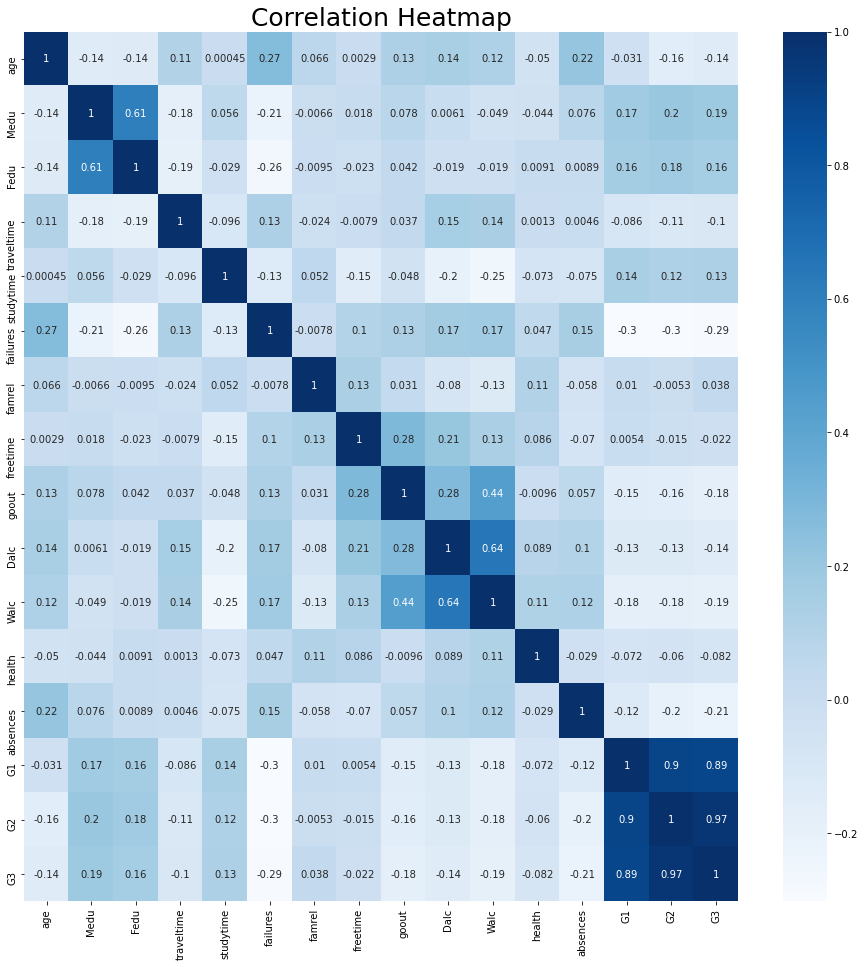

In [11]:
#Correlation matrix 
cor = data.corr()
plt.figure(figsize=(16,16))
sns.heatmap(cor, annot=True, cmap="Blues")
plt.title('Correlation Heatmap', fontsize=25)

In [4]:
# Load data from column G2 as our features
X = pd.DataFrame({'G2': data.G2})
        
# Load data from column G3 as our prediction target
Y = data.G3

In [5]:
# Create train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(285, 1) (285,)
(72, 1) (72,)


In [7]:
# Create linear regression model
model = LinearRegression()

In [8]:
# Train the model with our data
model.fit(X_train, Y_train)

LinearRegression()

In [9]:
# Make a prediction
Y_pred = model.predict(X_test)

In [10]:
# Print the results
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'Mean squared error (MSE): {mean_squared_error(Y_test, Y_pred)}')
print(f'Coefficient of determination (R^2): {r2_score(Y_test, Y_pred)}')

Coefficients: [0.99211853]
Intercept: 0.24890503110402484
Mean squared error (MSE): 0.48913989706391153
Coefficient of determination (R^2): 0.9527450386436952


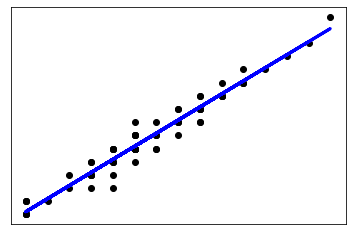

In [11]:
# Plot the graph
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Linear regression with all features

In [12]:
# Create label encoder with binary attributes
le = LabelEncoder()
binary_data = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for i in binary_data:
    data[i] = le.fit_transform(data[i])

# One hot encode the nominal attributes
data = pd.concat([data, pd.get_dummies(data['Mjob'], prefix='Mjob')], axis=1)
data = data.drop('Mjob', axis=1)
data = pd.concat([data, pd.get_dummies(data['Fjob'], prefix='Fjob')], axis=1)
data = data.drop('Fjob', axis=1)
data = pd.concat([data, pd.get_dummies(data['reason'], prefix='reason')], axis=1)
data = data.drop('reason', axis=1)
data = pd.concat([data, pd.get_dummies(data['guardian'], prefix='guardian')], axis=1)
data = data.drop('guardian', axis=1)

print(f"Data: \n{data[:5]}")

Data: 
   school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0       0    0   18        1        0        0     4     4           2   
1       0    0   17        1        0        1     1     1           1   
2       0    0   15        1        1        1     1     1           1   
3       0    0   15        1        0        1     4     2           1   
4       0    0   16        1        0        1     3     3           1   

   studytime  ...  Fjob_other  Fjob_services  Fjob_teacher  reason_course  \
0          2  ...           0              0             1              1   
1          2  ...           1              0             0              1   
2          2  ...           1              0             0              0   
3          3  ...           0              1             0              0   
4          2  ...           1              0             0              0   

   reason_home  reason_other  reason_reputation  guardian_father  \
0            0   

In [13]:
print(data.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')


In [14]:
# Loop through the columns and create new X DataFrame with features
X = pd.DataFrame()
count = 0
for i in data.columns:
    X.insert(count, i, data[i])
    count += 1
print(X.head())

   school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0       0    0   18        1        0        0     4     4           2   
1       0    0   17        1        0        1     1     1           1   
2       0    0   15        1        1        1     1     1           1   
3       0    0   15        1        0        1     4     2           1   
4       0    0   16        1        0        1     3     3           1   

   studytime  ...  Fjob_other  Fjob_services  Fjob_teacher  reason_course  \
0          2  ...           0              0             1              1   
1          2  ...           1              0             0              1   
2          2  ...           1              0             0              0   
3          3  ...           0              1             0              0   
4          2  ...           1              0             0              0   

   reason_home  reason_other  reason_reputation  guardian_father  \
0            0          

In [15]:
# Load data from column G3 as our prediction target
Y = data.G3

In [16]:
# Create train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
print(f"Training set X and Y: {X_train.shape}, {Y_train.shape}")
print(f"Testing set X and Y: {X_test.shape}, {Y_test.shape}")

Training set X and Y: (285, 46), (285,)
Testing set X and Y: (72, 46), (72,)


In [18]:
# Create linear regression model
model = linear_model.LinearRegression()

In [19]:
# Train the model with our data
model.fit(X_train, Y_train)

LinearRegression()

In [20]:
# Make a prediction
Y_pred = model.predict(X_test)

In [21]:
# Print the results
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'Mean squared error (MSE): {mean_squared_error(Y_test, Y_pred)}')
print(f'Coefficient of determination (R^2): {r2_score(Y_test, Y_pred)}')

Coefficients: [-2.10808984e-15  6.99130906e-16  1.14290845e-15 -4.13979948e-16
  6.52603162e-16  7.24815236e-16 -5.79338156e-16 -5.96358601e-16
  4.25007486e-17 -2.73021176e-16 -6.03803151e-16  1.59459755e-15
  5.61230695e-16 -4.54733509e-17  3.73899631e-16 -5.07180633e-16
  1.18077937e-15  5.47848424e-16 -5.42176571e-17 -4.31008590e-16
  1.67770584e-16  3.47544103e-16 -1.72587354e-17  2.19376007e-16
  2.63313615e-17 -2.05147673e-16  7.47538354e-16 -8.96634597e-16
  1.00000000e+00  6.23484142e-04  6.23484142e-04  6.23484142e-04
  6.23484142e-04  6.23484142e-04 -1.33805799e-03 -1.33805799e-03
 -1.33805799e-03 -1.33805799e-03 -1.33805799e-03 -9.95921677e-04
 -9.95921677e-04 -9.95921677e-04 -9.95921677e-04 -2.84398449e-03
 -2.84398449e-03 -2.84398449e-03]
Intercept: 0.004554480015665163
Mean squared error (MSE): 1.5590959279576386e-29
Coefficient of determination (R^2): 1.0


## Classification

In [22]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


In [23]:
# Create new binary attribute 'passed' based on the final grade,1 passed, 0 failed
processed_data = data[:]
# processed_data['G1'] = processed_data['G1']/20
# processed_data['G2'] = processed_data['G2']/20
processed_data['G3'] = processed_data['G3']/20
processed_data['passed'] = [1 if x >= 0.5 else 0 for x in processed_data['G3']]
Y_c = processed_data['passed']
Y_c.shape

(357,)

In [24]:
# Create train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_c, test_size=0.2)

In [25]:
print(f"Training set X and Y: {X_train.shape}, {Y_train.shape}")
print(f"Testing set X and Y: {X_test.shape}, {Y_test.shape}")

Training set X and Y: (285, 46), (285,)
Testing set X and Y: (72, 46), (72,)


In [26]:
# Create Logistic Regression model
clf = LogisticRegression(max_iter=200).fit(X_train, Y_train)

In [27]:
# Make a prediction
clf_pred = clf.predict(X_test)

acc = accuracy_score(clf_pred, Y_test)
preci = precision_score(clf_pred, Y_test)
recall = recall_score(clf_pred, Y_test)
f1 = f1_score(clf_pred, Y_test)
mean = mean_squared_error(Y_test, clf_pred)

In [28]:
# Print the results
print(f"Accuracy: {acc}")
print(f"Precision: {preci}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")
print(f"MSE: {mean}")

Accuracy: 0.9583333333333334
Precision: 0.9791666666666666
Recall: 0.9591836734693877
F1 score: 0.9690721649484536
MSE: 0.041666666666666664


## PCA

I was trying not to copy paste your code so I created a few models to compare the score and noise variance.

In [29]:
# Load data for X and Y
pca_y = data['G3']
pca_x = data.drop(['G3'], axis=1)

pca_x_norm = normalize(pca_x)

pca = PCA().fit(pca_x)

# Create PCA models
pca0 = PCA(n_components=29)
pca1 = PCA(n_components=26)
pca2 = PCA(n_components=17)
pca3 = PCA(n_components=10)

# Fit the models
pca0.fit(pca_x)
pca1.fit(pca_x)
pca2.fit(pca_x)
pca3.fit(pca_x)

PCA(n_components=10)

Text(0, 0.5, 'Variance explained')

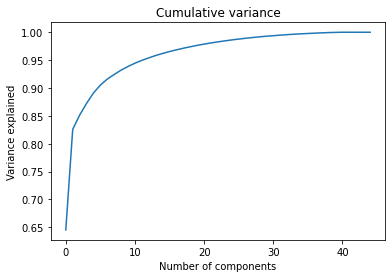

In [30]:
#Plotting cumulative variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative variance')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')

In [31]:
cumvar = np.cumsum(pca0.explained_variance_ratio_)

In [32]:
cumvar[20]

0.9787071100216223

In [33]:
# Transform the data
X_pca0 = pca0.transform(pca_x_norm)
X_pca1 = pca1.transform(pca_x_norm)
X_pca2 = pca2.transform(pca_x_norm)
X_pca3 = pca3.transform(pca_x_norm)
print(f"New Dataset size after transformations: \n PCA0: {X_pca0.shape}\n PCA1: {X_pca1.shape}\
        \n PCA2: {X_pca2.shape}\n PCA3: {X_pca3.shape}")

New Dataset size after transformations: 
 PCA0: (357, 29)
 PCA1: (357, 26)        
 PCA2: (357, 17)
 PCA3: (357, 10)


In [34]:
print(f"PCA(29-components) explained variance ratio: {np.cumsum(pca0.explained_variance_ratio_)[28]}")
print(f"PCA(26-components) explained variance ratio: {np.cumsum(pca1.explained_variance_ratio_)[25]}")
print(f"PCA(17-components) explained variance ratio: {np.cumsum(pca2.explained_variance_ratio_)[16]}")
print(f"PCA(17-components) explained variance ratio: {np.cumsum(pca3.explained_variance_ratio_)[9]}")

PCA(29-components) explained variance ratio: 0.9917777140044932
PCA(26-components) explained variance ratio: 0.9877360280305353
PCA(17-components) explained variance ratio: 0.9684080463344193
PCA(17-components) explained variance ratio: 0.9386175206204037
